# **1. Objective**
Apakah tingkat kesadaran publik terhadap energi terbarukan berpengaruh terhadap kapasitas terpasang energi terbarukan suatu negara?

# **2. Hypothesis Formulation**
- H0: Tidak ada perbedaan signifikan rata-rata Installed Capacity antara negara dengan Public Awareness tinggi dan rendah.

- H1: Ada perbedaan signifikan rata-rata Installed Capacity antara negara dengan Public Awareness tinggi dan rendah.

# **3. Experimental Design**
- Unit analisis: Negara

- Grup: Dikelompokkan berdasarkan median Public Awareness → Tinggi vs Rendah

- Metrik: Installed Capacity (MW)

- Tipe uji: Independent t-test (dengan uji asumsi: normalitas & homogenitas varians)

# **Load and Preview**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/complete_renewable_energy_dataset.csv')

In [ ]:
df.shape

(2500, 56)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  2500 non-null   object 
 1   Year                                     2500 non-null   int64  
 2   Energy Type                              2500 non-null   object 
 3   Production (GWh)                         2500 non-null   float64
 4   Installed Capacity (MW)                  2500 non-null   float64
 5   Investments (USD)                        2500 non-null   float64
 6   Population                               2500 non-null   int64  
 7   GDP                                      2500 non-null   float64
 8   Energy Consumption                       2500 non-null   float64
 9   Energy Exports                           2500 non-null   float64
 10  Energy Imports                           2500 no

In [ ]:
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,Energy Imports,CO2 Emissions,Renewable Energy Jobs,Government Policies,R&D Expenditure,Renewable Energy Targets,Average Annual Temperature,Annual Rainfall,Solar Irradiance,Wind Speed,Hydro Potential,Geothermal Potential,Biomass Availability,Energy Storage Capacity,Grid Integration Capability,Electricity Prices,Energy Subsidies,International Aid for Renewables,Public Awareness,Energy Efficiency Programs,Urbanization Rate,Industrialization Rate,Energy Market Liberalization,Renewable Energy Patents,Educational Level,Technology Transfer Agreements,Renewable Energy Education Programs,Local Manufacturing Capacity,Import Tariffs on Energy Equipment,Export Incentives for Energy Equipment,Natural Disasters,Political Stability,Corruption Perception Index,Regulatory Quality,Rule of Law,Control of Corruption,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,13413.184740,294399.377891,756878,1,8.676561e+09,1,21.956028,157.013457,203.038597,5.838375,95.597972,2.516637,30.267999,367.565683,0.313532,0.149868,1.688208e+08,2.368804e+08,7.171839,0,58.563018,9.518226,0,423,5.954401,0,1,58.774445,79.053459,1.627889,0,1.173771,8.829343,5.093916,2.207195,6.339640,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,78493.982208,826531.678252,945074,0,4.421452e+09,1,24.633256,1336.003208,111.133078,14.872917,71.734614,88.703683,36.036945,556.556033,0.836857,0.331144,8.452255e+08,1.525074e+08,9.350009,1,30.587331,29.718922,0,519,0.759240,0,1,82.397230,33.318547,96.104672,1,6.791902,3.757926,6.810465,6.312460,0.723385,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,41114.872188,43695.240191,588423,1,8.568534e+09,1,13.501934,357.517058,159.996442,3.473210,84.022292,6.611658,54.595948,30.986431,0.205287,0.157541,2.578337e+08,8.733413e+08,5.823927,1,31.913762,10.507145,0,215,3.632895,1,1,30.238886,91.861343,56.298393,0,4.904172,2.022068,1.265454,0.421432,8.898478,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,42010.475937,840378.796682,11049,1,9.958631e+09,0,1.090900,2271.312021,297.163614,13.575549,53.171731,39.856384,45.276134,592.948416,0.273251,0.452971,9.798269e+08,7.999380e+08,0.625429,1,89.946827,17.599183,1,73,4.590746,0,0,45.853940,60.541807,11.950116,1,8.879933,7.948651,3.821774,1.110782,3.849473,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,17912.961940,162034.254340,225191,0,7.608112e+09,1,30.641022,2285.016014,133.269378,14.964739,46.423859,98.648207,93.729796,933.738796,0.181811,0.058827,6.767606e+08,9.697182e+07,1.321406,0,44.692061,44.316166,1,859,0.001750,1,0,64.517651,95.846448,99.978460,1,7.700085,5.596968,2.029550,0.634602,1.345289,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


# Data Pre-Processing

## A. Missing Values

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Energy Type,0
Production (GWh),0
Installed Capacity (MW),0
Investments (USD),0
Population,0
GDP,0
Energy Consumption,0
Energy Exports,0


## B. Duplicate

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
len(df.drop_duplicates())/len(df)

1.0

## C. Data Manipulation

In [ ]:
# Filter berdasarkan tahun
df_2023 = df[(df['Year'] == 2023)]

In [ ]:
df_2023_agg = df_2023.groupby('Country', as_index=False).agg(
    Installed_Capacity_MW=('Installed Capacity (MW)', 'sum'),
    Energy_Consumption=('Energy Consumption', 'mean'),
    Renewable_Energy_Jobs=('Renewable Energy Jobs', 'mean'),
    Public_Awareness=('Public Awareness', 'mean'),
    Educational_Level=('Educational Level', 'mean'),
    Number_of_Research_Institutions=('Number of Research Institutions', 'mean')
)

In [ ]:
df_2023_agg

,Country,Installed_Capacity_MW,Energy_Consumption,Renewable_Energy_Jobs,Public_Awareness,Educational_Level,Number_of_Research_Institutions
0,Australia,258706.050404,421279.675588,580895.100000,4.289160,4.642250,708.100000
1,Brazil,330144.132674,566835.998534,521483.400000,5.579713,6.592494,482.600000
2,Canada,323265.955430,535398.260600,414266.466667,5.875887,5.893655,538.533333
3,China,356304.875787,453162.885787,522652.750000,5.921529,4.289449,650.083333
4,France,338384.471027,422343.240791,363228.000000,4.580012,4.662402,534.083333
5,Germany,368975.294664,508774.322211,479474.666667,5.298624,4.498463,481.166667
6,India,247812.717469,515376.455691,624590.600000,4.869263,5.865869,400.500000
7,Japan,398155.520263,579426.484459,602121.250000,4.464027,3.557638,454.250000
8,Russia,239558.757259,569298.651661,590620.555556,5.107027,4.478373,540.666667
9,USA,203760.457365,552852.985060,629997.875000,4.612230,5.221989,546.125000


# Exploratory Data Analysis

In [ ]:
df_2023_agg.describe()

,Installed_Capacity_MW,Energy_Consumption,Renewable_Energy_Jobs,Public_Awareness,Educational_Level,Number_of_Research_Institutions
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,306506.823234,512474.896038,532933.066389,5.059747,4.970258,533.610833
std,64468.929759,60371.779593,90807.513198,0.591965,0.911391,90.438615
min,203760.457365,421279.675588,363228.000000,4.289160,3.557638,400.500000
25%,250536.050703,467065.744893,489976.850000,4.588066,4.483396,481.525000
50%,326705.044052,525387.358145,551773.925000,4.988145,4.652326,536.308333
75%,351824.774597,563340.245166,599246.076389,5.509441,5.704899,544.760417
max,398155.520263,579426.484459,629997.875000,5.921529,6.592494,708.100000


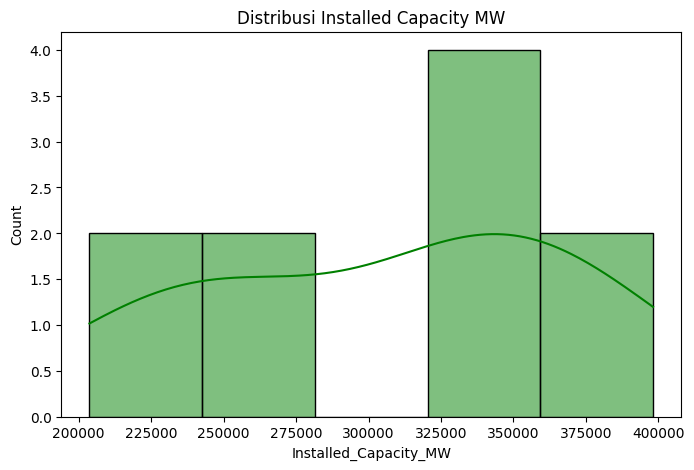

In [ ]:
#Distribusi Installed Capacity
plt.figure(figsize=(8,5))
sns.histplot(df_2023_agg['Installed_Capacity_MW'], kde=True, color='green')
plt.title('Distribusi Installed Capacity MW')
plt.show()

- Installed Capacity (MW)
  - Total kapasitas energi terpasang antar negara sangat bervariasi.

  - Nilai rata-rata berada di sekitar 306.508 MW, dengan nilai maksimum mencapai 398.155 MW (tertinggi) dan minimum 203.780 MW (terendah).

  - Distribusinya relatif seimbang, namun ada kecenderungan konsentrasi di tengah (325.000 MW ke atas).

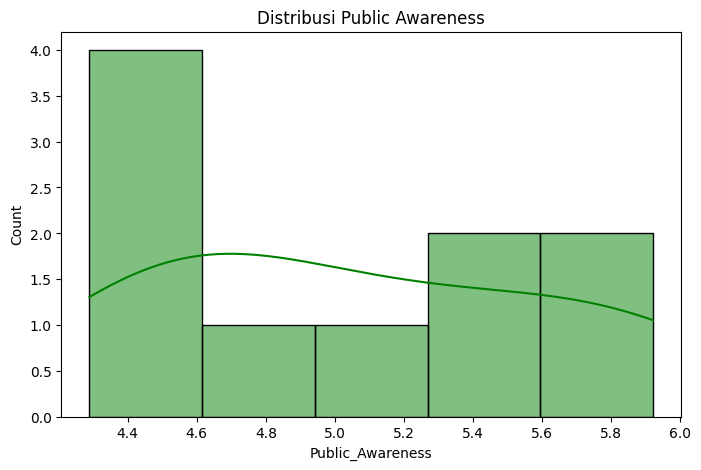

In [ ]:
#Distribusi Public Awareness
plt.figure(figsize=(8,5))
sns.histplot(df_2023_agg['Public_Awareness'], kde=True, color='green')
plt.title('Distribusi Public Awareness')
plt.show()

**Public Awareness**
- Nilai kesadaran publik berkisar antara 4.29 – 5.92 (dalam skala tertentu).

- Distribusi agak miring ke kiri, menandakan bahwa sebagian besar negara berada di awareness level menengah-rendah.

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
# custom diverging colormap: biru → putih → hijau
custom_cmap = LinearSegmentedColormap.from_list(
    'blue_white_green',
    ['#07363b', '#ffffff', '#30e8b0'])

In [ ]:
numerical_column = [
    'Installed_Capacity_MW',
    'Energy_Consumption',
    'Renewable_Energy_Jobs',
    'Public_Awareness',
    'Educational_Level',
    'Number_of_Research_Institutions'
]

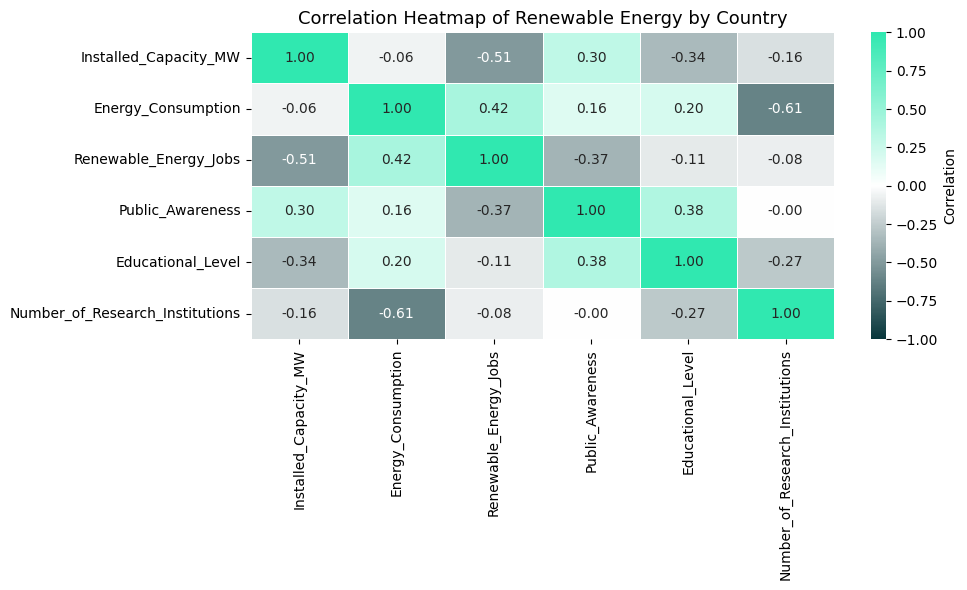

In [ ]:
corr_matrix = df_2023_agg[numerical_column].corr()


plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)


# ax.set_xticklabels(ax.get_xticklabels(), color='white', rotation=45, ha='right')
# ax.set_yticklabels(ax.get_yticklabels(), color='white')
# ax.tick_params(colors='white')
# ax.title.set_color('white')


# colorbar = ax.collections[0].colorbar
# colorbar.ax.tick_params(colors='white')
# colorbar.ax.yaxis.label.set_color('white')

plt.title("Correlation Heatmap of Renewable Energy by Country", fontsize=13)
plt.tight_layout()
# plt.savefig("heatmap_fix.png", dpi=300, transparent=True)
plt.show()

- Korelasi signifikan:

  - Installed Capacity dan Renewable Energy Jobs: negatif (-0.51) → bisa menunjukkan bahwa negara dengan kapasitas besar tidak selalu menciptakan banyak pekerjaan langsung.

  - Public Awareness punya korelasi positif sedang dengan Educational Level (0.38)

- Korelasi antar variabel cenderung lemah hingga sedang, menunjukkan kompleksitas hubungan antar faktor dalam pengembangan energi terbarukan.

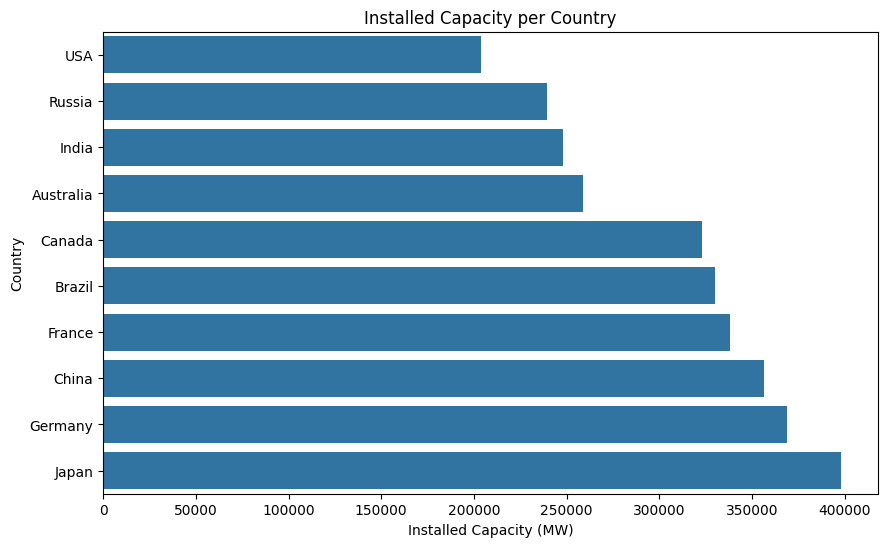

In [ ]:
# barplot perbandingan antar negara
plt.figure(figsize=(10, 6))
sns.barplot(x='Installed_Capacity_MW', y='Country', data=df_2023_agg.sort_values('Installed_Capacity_MW'))
plt.xlabel('Installed Capacity (MW)')
plt.ylabel('Country')
plt.title("Installed Capacity per Country")
plt.show()

# **A/B Testing: Public Awareness vs Installed Capacity**
  - Tujuan:
  Mengetahui apakah negara dengan tingkat Public Awareness tinggi memiliki Installed Capacity yang lebih besar dibandingkan yang rendah.

In [ ]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind

In [ ]:
# Grup Berdasarkan Median Public Awareness
median_awareness = df_2023_agg['Public_Awareness'].median()

df_2023_agg['Awareness_Group'] = df_2023_agg['Public_Awareness'].apply(
    lambda x: 'High' if x > median_awareness else 'Low'
)

In [ ]:
# memishakan menjadi Dua Grup
group_high = df_2023_agg[df_2023_agg['Awareness_Group'] == 'High']['Installed_Capacity_MW']
group_low = df_2023_agg[df_2023_agg['Awareness_Group'] == 'Low']['Installed_Capacity_MW']

In [ ]:
# Shapiro-Wilk (Normalitas)
print("High Group:", shapiro(group_high))
print("Low Group:", shapiro(group_low))

High Group: ShapiroResult(statistic=np.float64(0.8631730358345554), pvalue=np.float64(0.23986624439701415))
Low Group: ShapiroResult(statistic=np.float64(0.9416927024122687), pvalue=np.float64(0.6779293712298389))


- Grup High Public Awareness

  - p-value: 0.2399 → p > 0.05

- Grup Low Public Awareness

  - p-value: 0.6779 → p > 0.05

- Kedua grup memiliki distribusi data yang normal, karena p-value > 0.05.

- Maka, asumsi normalitas untuk uji t dapat dipenuhi.

In [ ]:
# Levene Test (Homogenitas)
levene(group_high, group_low)

LeveneResult(statistic=np.float64(0.6723656658643198), pvalue=np.float64(0.43597567363607964))

- p-value: 0.4359 → p > 0.05

- Varians antara dua grup dapat dianggap homogen (sama).

- Maka, asumsi homogenitas terpenuhi, dan dapat menggunakan equal_var=True dalam t-test.

In [ ]:
ttest_ind(group_high, group_low, equal_var=True)

TtestResult(statistic=np.float64(0.8258995819675996), pvalue=np.float64(0.432799144783796), df=np.float64(8.0))

- Nilai p-value = 0.4328 > 0.05, maka kita gagal menolak H0.

- Artinya, tidak ada perbedaan signifikan secara statistik antara rata-rata Installed Capacity pada negara dengan tingkat Public Awareness tinggi vs rendah.

- Meskipun pada eksplorasi awal korelasinya positif (r = 0.30), namun perbedaan rerata antar grup tidak signifikan secara statistik.

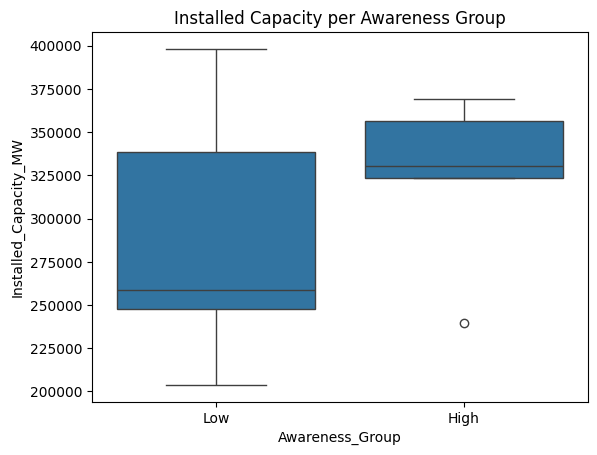

In [ ]:
# visualisasi distribusi
sns.boxplot(x='Awareness_Group', y='Installed_Capacity_MW', data=df_2023_agg)
plt.title("Installed Capacity per Awareness Group")
plt.show()

- Grup High Awareness menunjukkan distribusi yang lebih sempit dan konsisten, artinya nilai Installed Capacity antar negara cenderung berdekatan.

- Grup Low Awareness memiliki variabilitas yang lebih tinggi, mencerminkan ketidakteraturan dalam kapasitas terpasang.

- Terdapat outlier pada grup High Awareness (sekitar 240.000 MW), yang dapat menandakan negara dengan kesadaran tinggi tetapi kapasitas rendah — bisa jadi karena faktor eksternal lain (misalnya sumber daya alam atau kebijakan).

- Meskipun nilai tengah (median) grup High terlihat lebih tinggi, namun t-test sebelumnya menunjukkan bahwa perbedaan ini tidak signifikan secara statistik.

# Exporting dataset

In [ ]:
df_2023_agg.to_csv("renewable_dashboard_2023.csv", index=False)

In [ ]:
df_2023_agg.to_csv("df_2023_agg.csv", index=False, float_format='%.2f')

In [ ]:
df.to_csv("Cleaned_Renewable_Energy.csv", index=False, float_format='%.2f')